<a href="https://colab.research.google.com/github/nadeemlameec/Data_science/blob/main/Bagging_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [18]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]


In [20]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
59,2.7,3.9,1
68,2.2,4.5,1
90,2.6,4.4,1
104,3.0,5.8,2
58,2.9,4.6,1
51,3.2,4.5,1
107,2.9,6.3,2
73,2.8,4.7,1
103,2.9,5.6,2
53,2.3,4.0,1


In [23]:
df=df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(10)
df_test =df.iloc[80:,:].sample(5)



In [25]:
df_val

,SepalWidthCm,PetalLengthCm,Species
108,2.5,5.8,2
97,2.9,4.3,1
127,3.0,4.9,2
100,3.3,6.0,2
55,2.8,4.5,1
129,3.0,5.8,2
131,3.8,6.4,2
75,3.0,4.4,1
143,3.2,5.9,2
51,3.2,4.5,1


In [26]:
df_test

,SepalWidthCm,PetalLengthCm,Species
77,3.0,5.0,1
95,3.0,4.2,1
101,2.7,5.1,2
116,3.0,5.5,2
147,3.0,5.2,2


# **Bagging**

In [28]:
df_bag = df_train.sample(10,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
X
y
df_bag

,SepalWidthCm,PetalLengthCm,Species
137,3.1,5.5,2
125,3.2,6.0,2
80,2.4,3.8,1
80,2.4,3.8,1
120,3.2,5.7,2
50,3.2,4.7,1
80,2.4,3.8,1
68,2.2,4.5,1
137,3.1,5.5,2
137,3.1,5.5,2


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score


In [53]:
dt_bag1=DecisionTreeClassifier()
dt_bag1.fit(X,y)

DecisionTreeClassifier()

In [55]:
evalute_bag = dt_bag1.predict(df_val.iloc[:,0:2])
accuracy_score(df_val.iloc[:,-1],evalute_bag)

0.9

In [37]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
125,3.2,6.0,2
148,3.4,5.4,2
125,3.2,6.0,2
80,2.4,3.8,1
125,3.2,6.0,2
137,3.1,5.5,2
50,3.2,4.7,1
50,3.2,4.7,1


In [41]:
dt_bag2 = DecisionTreeClassifier()
dt_bag2.fit(X,y)

DecisionTreeClassifier()

In [43]:
dt_bag2.predict(df_val.iloc[:,0:2])


array([2, 1, 1, 2, 1, 2, 2, 1, 2, 1])

In [45]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
87,2.3,4.4,1
80,2.4,3.8,1
68,2.2,4.5,1
120,3.2,5.7,2
120,3.2,5.7,2
120,3.2,5.7,2
50,3.2,4.7,1
88,3.0,4.1,1


In [47]:

dt_bag3 = DecisionTreeClassifier()

In [50]:
dt_bag3.fit(X,y)

DecisionTreeClassifier()

In [51]:
df_test

,SepalWidthCm,PetalLengthCm,Species
77,3.0,5.0,1
95,3.0,4.2,1
101,2.7,5.1,2
116,3.0,5.5,2
147,3.0,5.2,2


In [65]:
print("Predictor 1",dt_bag1.predict(np.array([3.0,5.5]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.0,5.5]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.0,5.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


In [71]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))


In [72]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

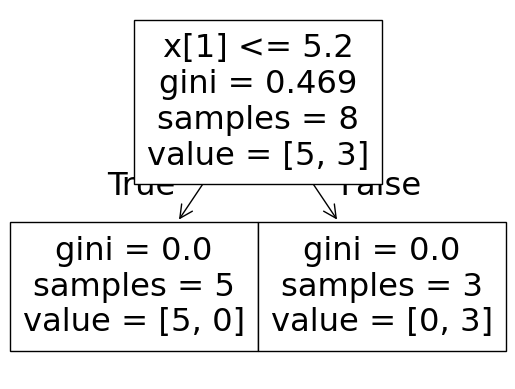

0.9


In [74]:
evaluate(dt_bag1,X,y)


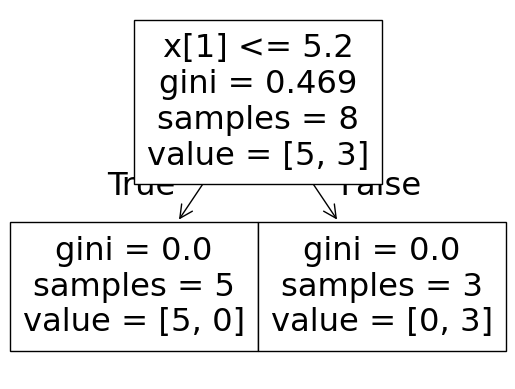

0.9


In [76]:
evaluate(dt_bag2,X,y)

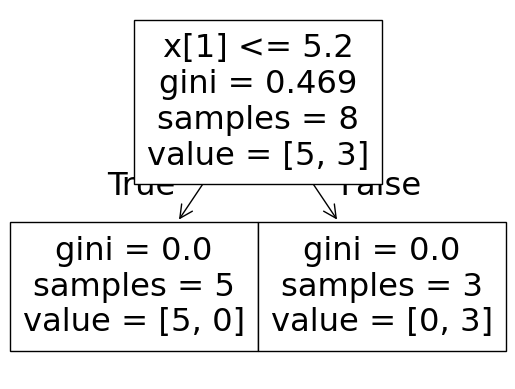

0.9


In [77]:
evaluate(dt_bag3,X,y)